# Problem Statement: Abalone Age Prediction

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset

In [81]:
data=pd.read_csv("abalone.csv")

In [82]:
data.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

In [83]:
data.shape

(4177, 9)

In [84]:
data.size

37593

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


 # Data Analysis & Visualization

### Univariate Analysis

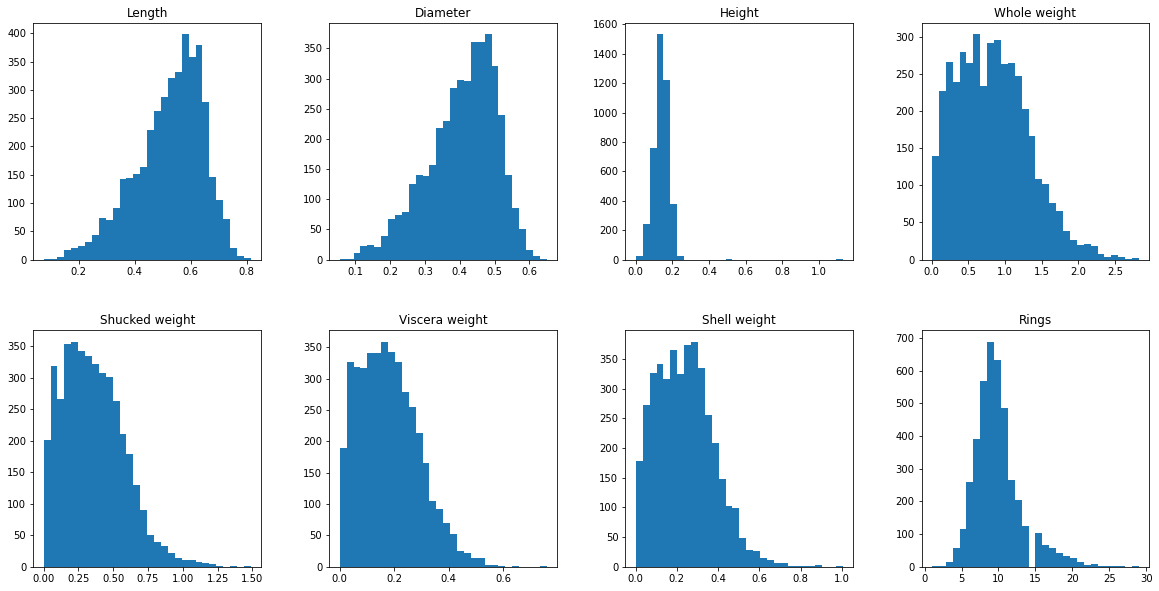

In [86]:
data.hist(figsize=(20,10), grid=False, layout=(2,4), bins=30)
plt.show()

<AxesSubplot:ylabel='Frequency'>

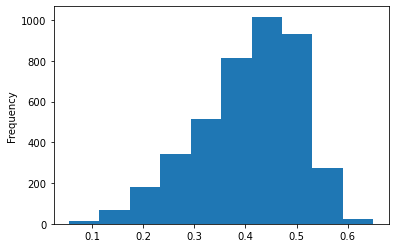

In [87]:
data["Diameter"].plot(kind='hist')

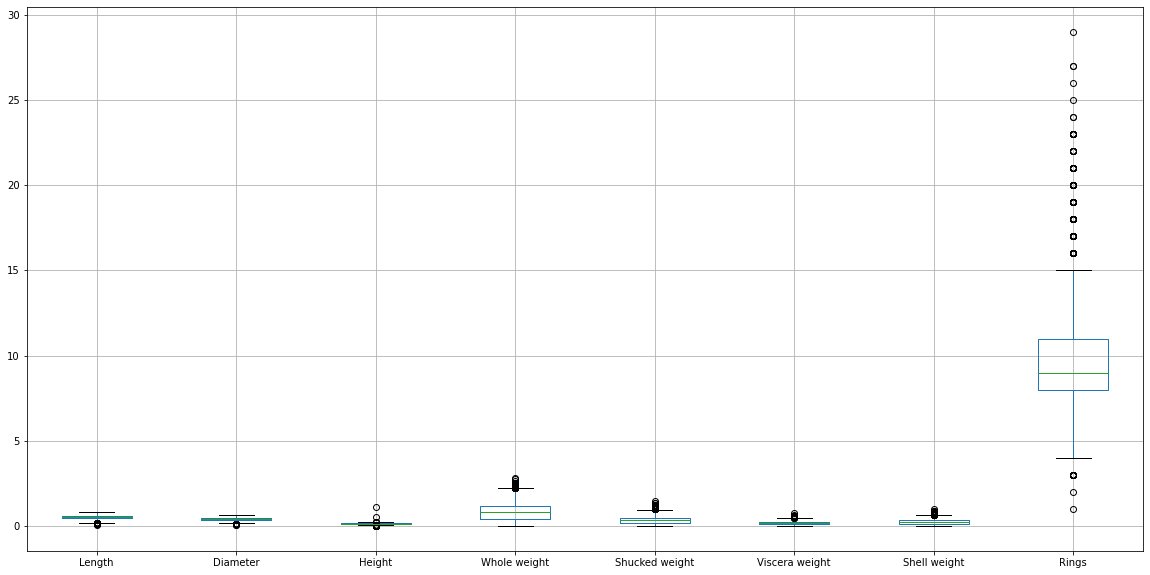

In [88]:
data.boxplot(figsize=(20,10))
plt.show()

### Bivariate Analysis

In [89]:
data.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  Viscera weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell weight  Rings  
0         0.150     15  
1         0.070      7  
2         0.210      9  
3         0.155     10  
4         0.055      7

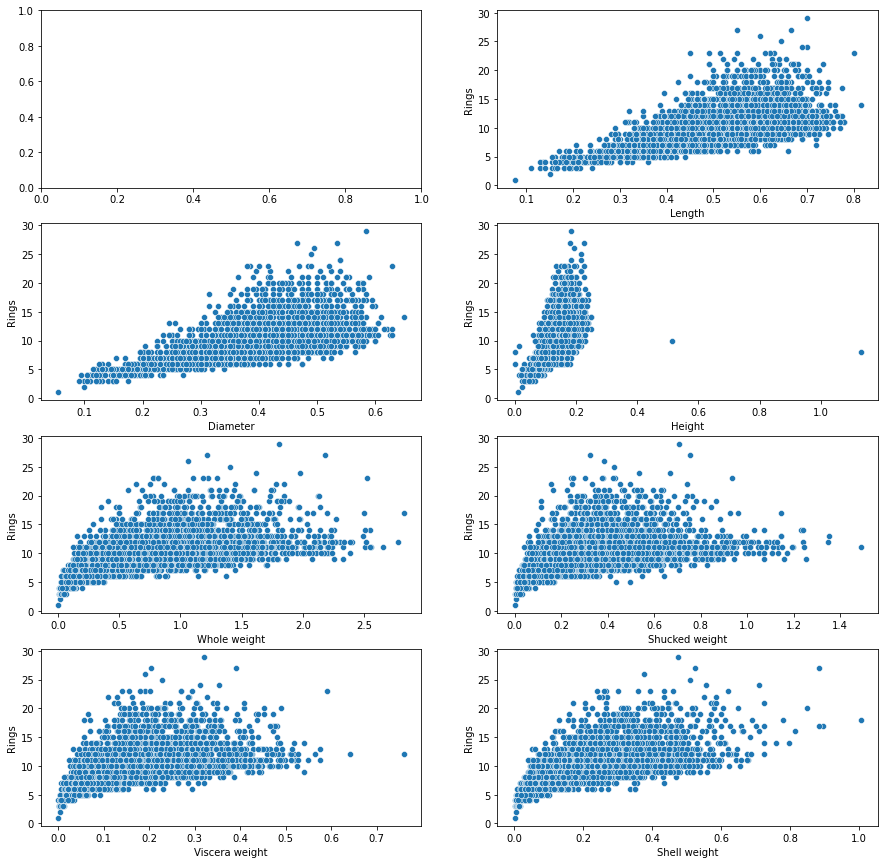

In [90]:
fig, axes = plt.subplots(4,2, figsize=(15,15))
axes = axes.flatten()
for i in range(1,len(data.columns)-1):
    sns.scatterplot(x=data.iloc[:,i], y=data['Rings'], ax=axes[i])
plt.show()

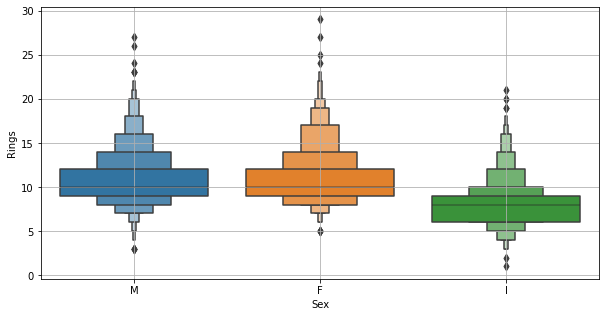

count       mean       std  min  25%   50%   75%   max
Sex                                                         
F    1307.0  11.129304  3.104256  5.0  9.0  10.0  12.0  29.0
I    1342.0   7.890462  2.511554  1.0  6.0   8.0   9.0  21.0
M    1528.0  10.705497  3.026349  3.0  9.0  10.0  12.0  27.0

In [91]:
plt.figure(figsize=(10,5))
sns.boxenplot(y=data['Rings'], x=data['Sex'])
plt.grid()
plt.show()
data.groupby('Sex')['Rings'].describe()

### Multivariate Analysis

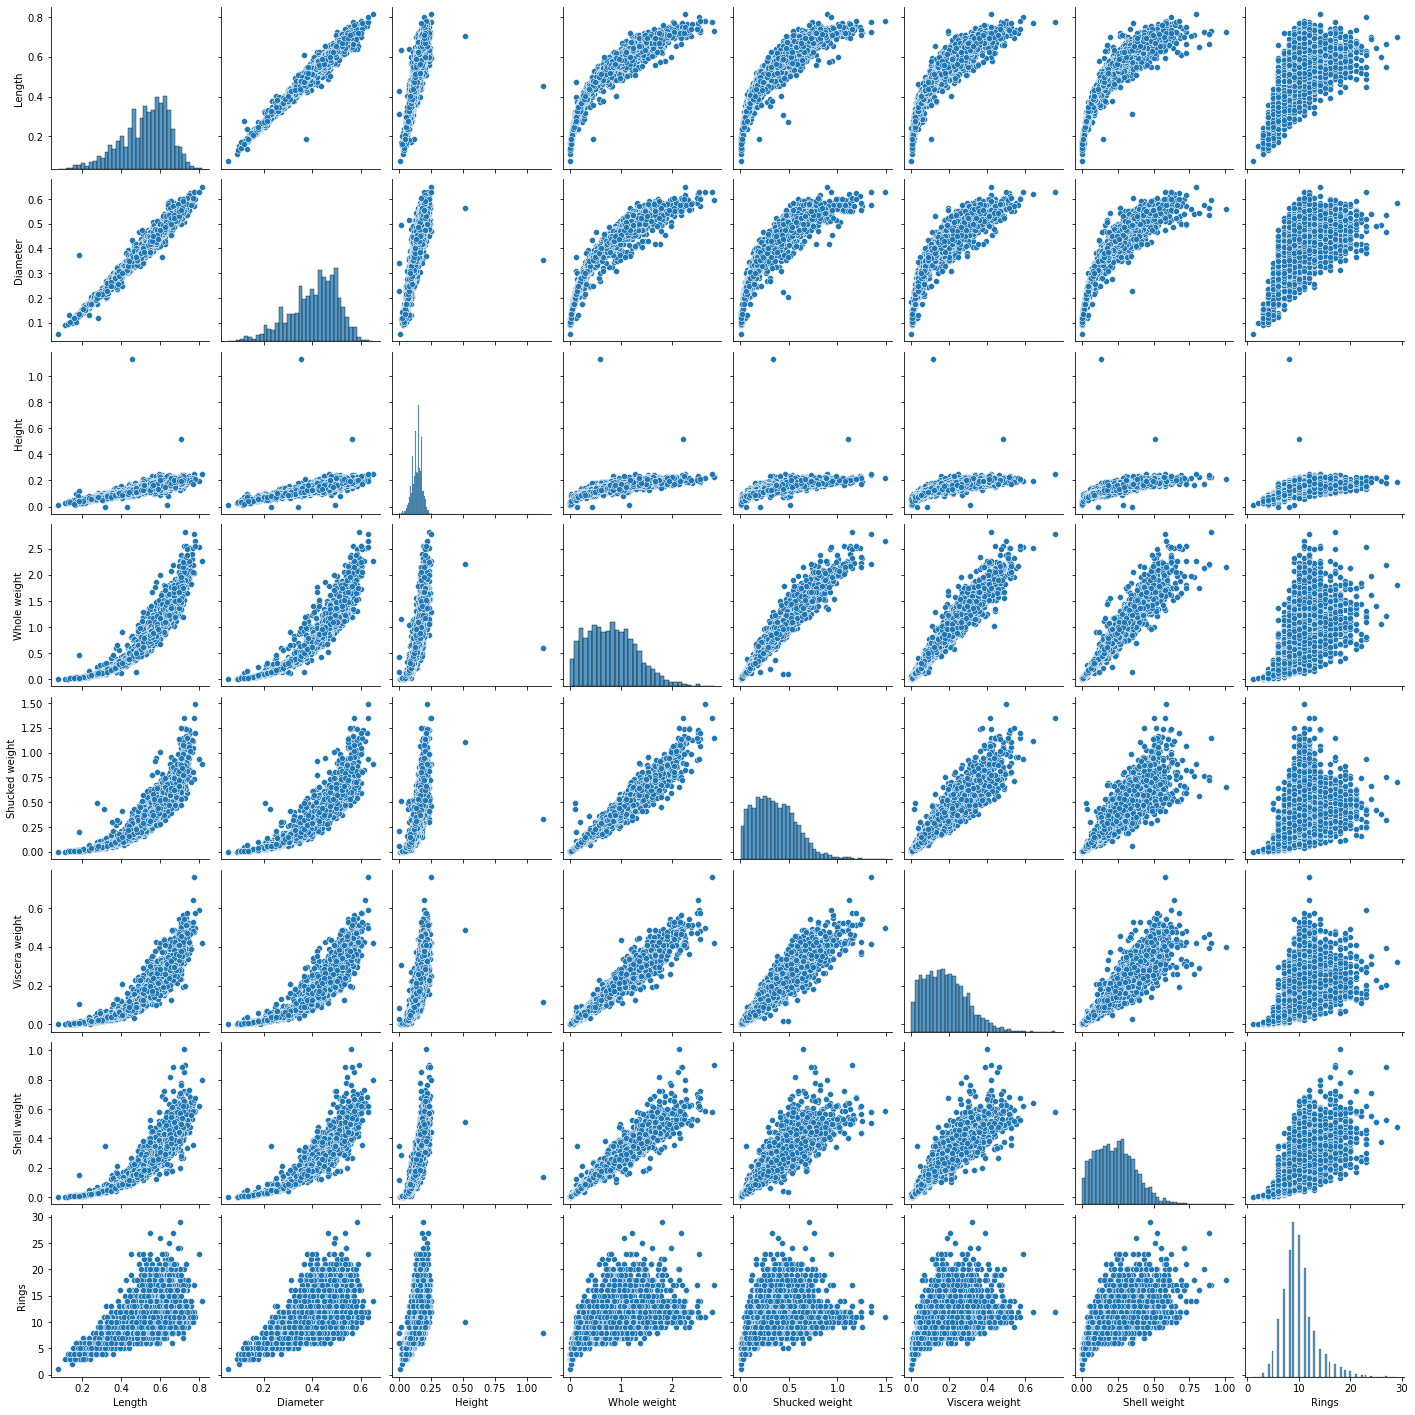

In [92]:
sns.pairplot(data)

## Descriptive statistics

In [93]:
data.describe()

Length     Diameter       Height  Whole weight  Shucked weight  \
count  4177.000000  4177.000000  4177.000000   4177.000000     4177.000000   
mean      0.523992     0.407881     0.139516      0.828742        0.359367   
std       0.120093     0.099240     0.041827      0.490389        0.221963   
min       0.075000     0.055000     0.000000      0.002000        0.001000   
25%       0.450000     0.350000     0.115000      0.441500        0.186000   
50%       0.545000     0.425000     0.140000      0.799500        0.336000   
75%       0.615000     0.480000     0.165000      1.153000        0.502000   
max       0.815000     0.650000     1.130000      2.825500        1.488000   

       Viscera weight  Shell weight        Rings  
count     4177.000000   4177.000000  4177.000000  
mean         0.180594      0.238831     9.933684  
std          0.109614      0.139203     3.224169  
min          0.000500      0.001500     1.000000  
25%          0.093500      0.130000     8.000000  
50%          0.171000      0.234000     9.000000  
75%          0.253000      0.329000    11.000000  
max          0.760000      1.005000    29.000000

## Handle The Missing values

In [94]:
data.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

In [95]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# Find the outliers

In [96]:
data.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

<AxesSubplot:xlabel='Rings'>

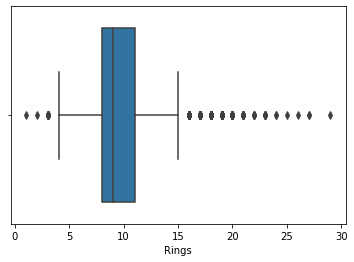

In [97]:
sns.boxplot(x=data['Rings'],data=data)

<AxesSubplot:>

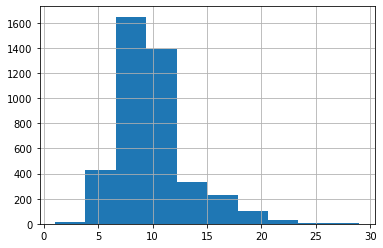

In [98]:
data['Rings'].hist()

In [99]:
print('skewness value of Age: ',data['Rings'].skew())

skewness value of Age:  1.114101898355677


In [100]:
# Flooring And Capping

Q1 = data['Rings'].quantile(0.25)
Q3 = data['Rings'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 +(whisker_width*IQR)
data['Rings']=np.where(data['Rings']>upper_whisker,upper_whisker,np.where(data['Rings']<lower_whisker,lower_whisker,data['Rings']))


<AxesSubplot:xlabel='Rings'>

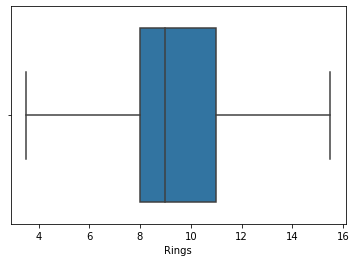

In [101]:
sns.boxplot(x=data['Rings'],data=data)

 # Categorical encoding

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   float64
dtypes: float64(8), object(1)
memory usage: 293.8+ KB


In [103]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

data['Sex']=le.fit_transform(data['Sex'])

In [104]:
data.head()

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0    2   0.455     0.365   0.095        0.5140          0.2245   
1    2   0.350     0.265   0.090        0.2255          0.0995   
2    0   0.530     0.420   0.135        0.6770          0.2565   
3    2   0.440     0.365   0.125        0.5160          0.2155   
4    1   0.330     0.255   0.080        0.2050          0.0895   

   Viscera weight  Shell weight  Rings  
0          0.1010         0.150   15.0  
1          0.0485         0.070    7.0  
2          0.1415         0.210    9.0  
3          0.1140         0.155   10.0  
4          0.0395         0.055    7.0

In [105]:
data["Sex"].unique()

array([2, 0, 1])

# Split the data into training and testing

In [106]:
data.head(5)

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0    2   0.455     0.365   0.095        0.5140          0.2245   
1    2   0.350     0.265   0.090        0.2255          0.0995   
2    0   0.530     0.420   0.135        0.6770          0.2565   
3    2   0.440     0.365   0.125        0.5160          0.2155   
4    1   0.330     0.255   0.080        0.2050          0.0895   

   Viscera weight  Shell weight  Rings  
0          0.1010         0.150   15.0  
1          0.0485         0.070    7.0  
2          0.1415         0.210    9.0  
3          0.1140         0.155   10.0  
4          0.0395         0.055    7.0

In [107]:
X = data.iloc[:, 0:7]
Y = data.iloc[:,-1]

In [109]:
X

Sex  Length  Diameter  Height  Whole weight  Shucked weight  \
0       2   0.455     0.365   0.095        0.5140          0.2245   
1       2   0.350     0.265   0.090        0.2255          0.0995   
2       0   0.530     0.420   0.135        0.6770          0.2565   
3       2   0.440     0.365   0.125        0.5160          0.2155   
4       1   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    0   0.565     0.450   0.165        0.8870          0.3700   
4173    2   0.590     0.440   0.135        0.9660          0.4390   
4174    2   0.600     0.475   0.205        1.1760          0.5255   
4175    0   0.625     0.485   0.150        1.0945          0.5310   
4176    2   0.710     0.555   0.195        1.9485          0.9455   

      Viscera weight  
0             0.1010  
1             0.0485  
2             0.1415  
3             0.1140  
4             0.0395  
...              ...  
4172          0.2390  
4173          0.2145  
4174          0.2875  
4175          0.2610  
4176          0.3765  

[4177 rows x 7 columns]

In [110]:
Y

0       15.0
1        7.0
2        9.0
3       10.0
4        7.0
        ... 
4172    11.0
4173    10.0
4174     9.0
4175    10.0
4176    12.0
Name: Rings, Length: 4177, dtype: float64

In [111]:
y.shape

(4177, 0)

# Scale the independent variables

In [112]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

# Split the data into training and testing 

In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size = 0.3, random_state = 1)

# Build the Model

`Training the Model`
`Testing the Model`

In [114]:
import csv
with open("abalone.csv") as csv_file:
    csv_reader = csv.reader(csv_file)
    data = pd.DataFrame([csv_reader], index = None)
for val in list(data[1]):
    print(val)

['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15', '15']


# Training and Testing Module 

1.Linear Regression
2.Ridge
3.Decision Tree Regression
4.KNeighborsRegressor

In [116]:
#importing all the neccessary models and metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score

1. Linear Regression

In [117]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [118]:
#Testing the model
lr_test_pred = lr.predict(x_test)

In [119]:
lr_test_pred

array([8.49722433, 7.64369059, 7.82520883, ..., 8.55677832, 9.02884473,
       5.96561877])

In [120]:
#measuring the performance
mse = mean_squared_error(y_test, lr_test_pred)
print('Mean Squared error of testing Set: %2f'%mse)

Mean Squared error of testing Set: 3.524602


In [121]:
p = r2_score(y_test, lr_test_pred)
print('R2 Score of testing set:%.2f'%p)

R2 Score of testing set:0.52


2. Ridge

In [122]:
ridge_mod = Ridge(alpha=0.01, normalize=True)
ridge_mod.fit(x_train, y_train)
ridge_mod.fit(x_test, y_test)

Ridge(alpha=0.01, normalize=True)

In [123]:
#Testing the model
ridge_model_pred = ridge_mod.predict(x_test)

In [124]:
ridge_model_pred 

array([8.54031033, 8.48463396, 7.96838487, ..., 8.77493484, 9.03881023,
       5.83582085])

In [125]:
#Measuring the performance
acc = r2_score(y_test, ridge_model_pred)
print('Score of testing Set: %2f'%acc)

Score of testing Set: 0.523227


3. Decision Tree Regression

In [126]:
dt =  DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [127]:
#Testing the model
dt_test_pred = dt.predict(x_test)

In [128]:

dt_test_pred

array([12.,  9., 10., ...,  7.,  9.,  4.])

In [129]:
#Measuring the Performance
dacc = mean_squared_error(y_test, dt_test_pred)
print('Mean Squared Error of testing Set: %2f'%dacc)

Mean Squared Error of testing Set: 6.126994


4. KNN Regression

In [130]:
knn = KNeighborsRegressor(n_neighbors = 4 )
knn.fit(x_train, y_train)
knn.fit(x_test, y_test)

KNeighborsRegressor(n_neighbors=4)

In [131]:
#Testing the Model
knn_test_pred = knn.predict(x_test)

In [132]:
knn_test_pred

array([ 8.75,  9.5 , 10.5 , ...,  8.  ,  7.5 ,  5.  ])

In [133]:
#Measuring the Performance
kacc= r2_score(knn_test_pred,y_test)
print('Score of testing Set: %2f'%kacc)

Score of testing Set: 0.400555


In [134]:
kmse = mean_squared_error(knn_test_pred,y_test)
print('Score of testing Set: %2f'%kmse)

Score of testing Set: 2.602460
